<a href="https://colab.research.google.com/github/TheoHelfenberger/notes-handson-ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Matrix Calculus](https://atmos.uw.edu/~dennis/MatrixCalculus.pdf)

[Details for Normal equation for linear regression](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[Matplotlib](https://www.analyticsvidhya.com/blog/2020/05/10-matplotlib-tricks-data-visualization-python/)

*Normal Equation*
$$ \hat\theta = (X^TX)^\mathsf{-1} X^T y $$

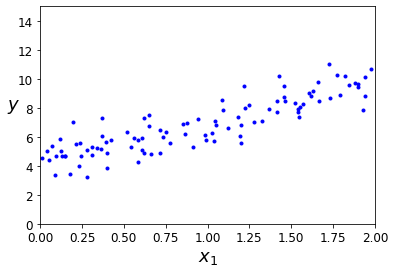

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

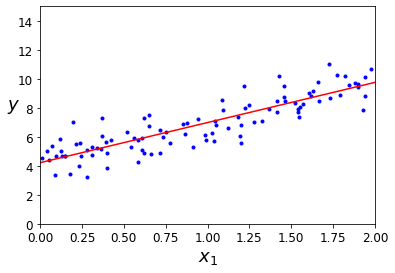

In [36]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Uses Pseudo Inverse - Moore Penrose Inverse

In [40]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])